**Chapter 6 – Decision Trees**

_This notebook contains all the sample code and solutions to the exercises in chapter 6._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/06_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

This project requires Python 3.7 or above:

In [1]:
from IPython.core.interactiveshell import InteractiveShell # make all output in ipython show, not just last line
InteractiveShell.ast_node_interactivity = "all"   # pretty print all cell's output and not just the last one
%matplotlib inline
import sklearn
sklearn.set_config(display="diagram")

In [2]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/decision_trees` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Decision tree algorithm:

Decision tree CART: https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart
What are all the various decision tree algorithms and how do they differ from each other? Which one is implemented in scikit-learn?

ID3 (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalize to unseen data.

C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. The accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

C5.0 is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

scikit-learn uses an optimized version of the CART algorithm; however, the scikit-learn implementation does not support categorical variables for now

# Training and Visualizing a Decision Tree

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

**This code example generates Figure 6–1. Iris Decision Tree:**

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  # path differs in the book
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

You can visualize the trained decision tree by first using the export_graphviz() function to output a graph definition file called iris_tree.dot:

Then you can use graphviz.Source.from_file() to load and display the file in a Jupyter notebook:

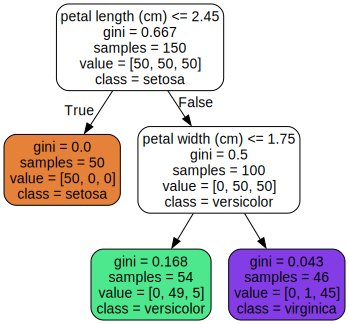

In [8]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")  # path differs in the book

Graphviz also provides the `dot` command line tool to convert `.dot` files to a variety of formats. The following command converts the dot file to a png image:

In [9]:
# extra code
!dot -Tpng {IMAGES_PATH / "iris_tree.dot"} -o {IMAGES_PATH / "iris_tree.png"}

# Making Predictions

https://towardsdatascience.com/gini-impurity-measure-dbd3878ead33 and https://en.wikipedia.org/wiki/Gini_coefficient  * note income inequality is a different calculation than we use in decision trees

Gini Impurity tells us what is the probability of misclassifying an observation.

Note that the lower the Gini the better the split. In other words the lower the likelihood of misclassification.
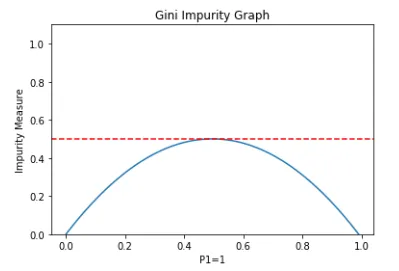

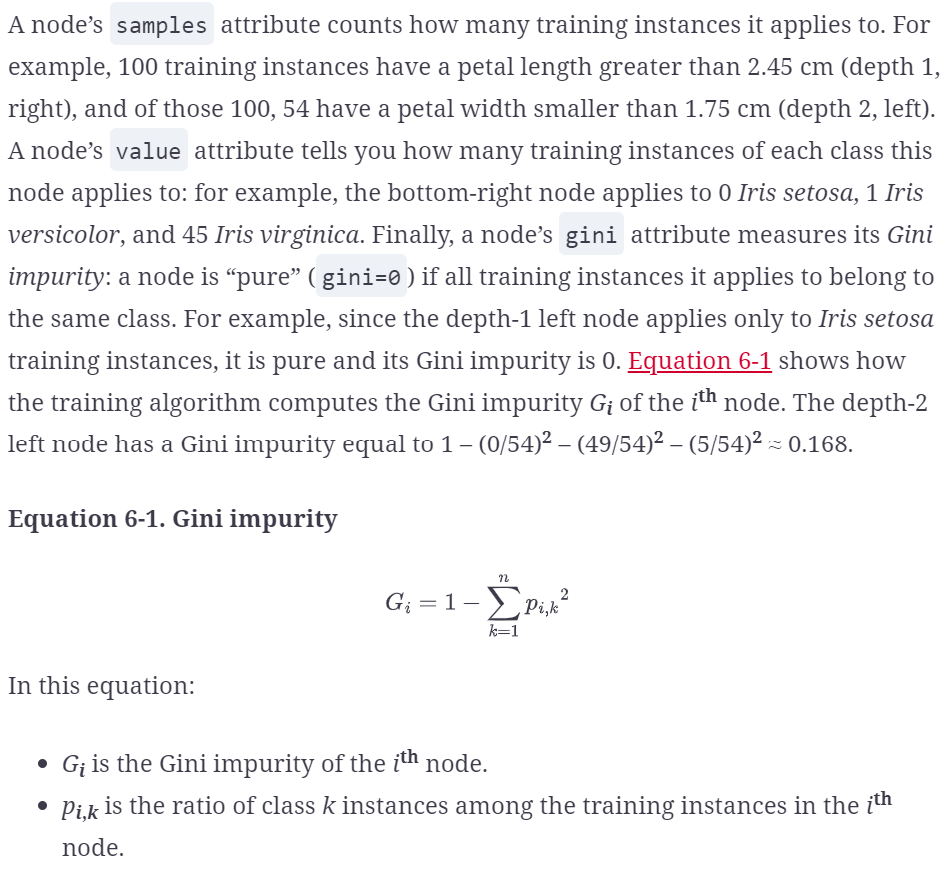

## Entropy:
https://en.wikipedia.org/wiki/Entropy_(information_theory)
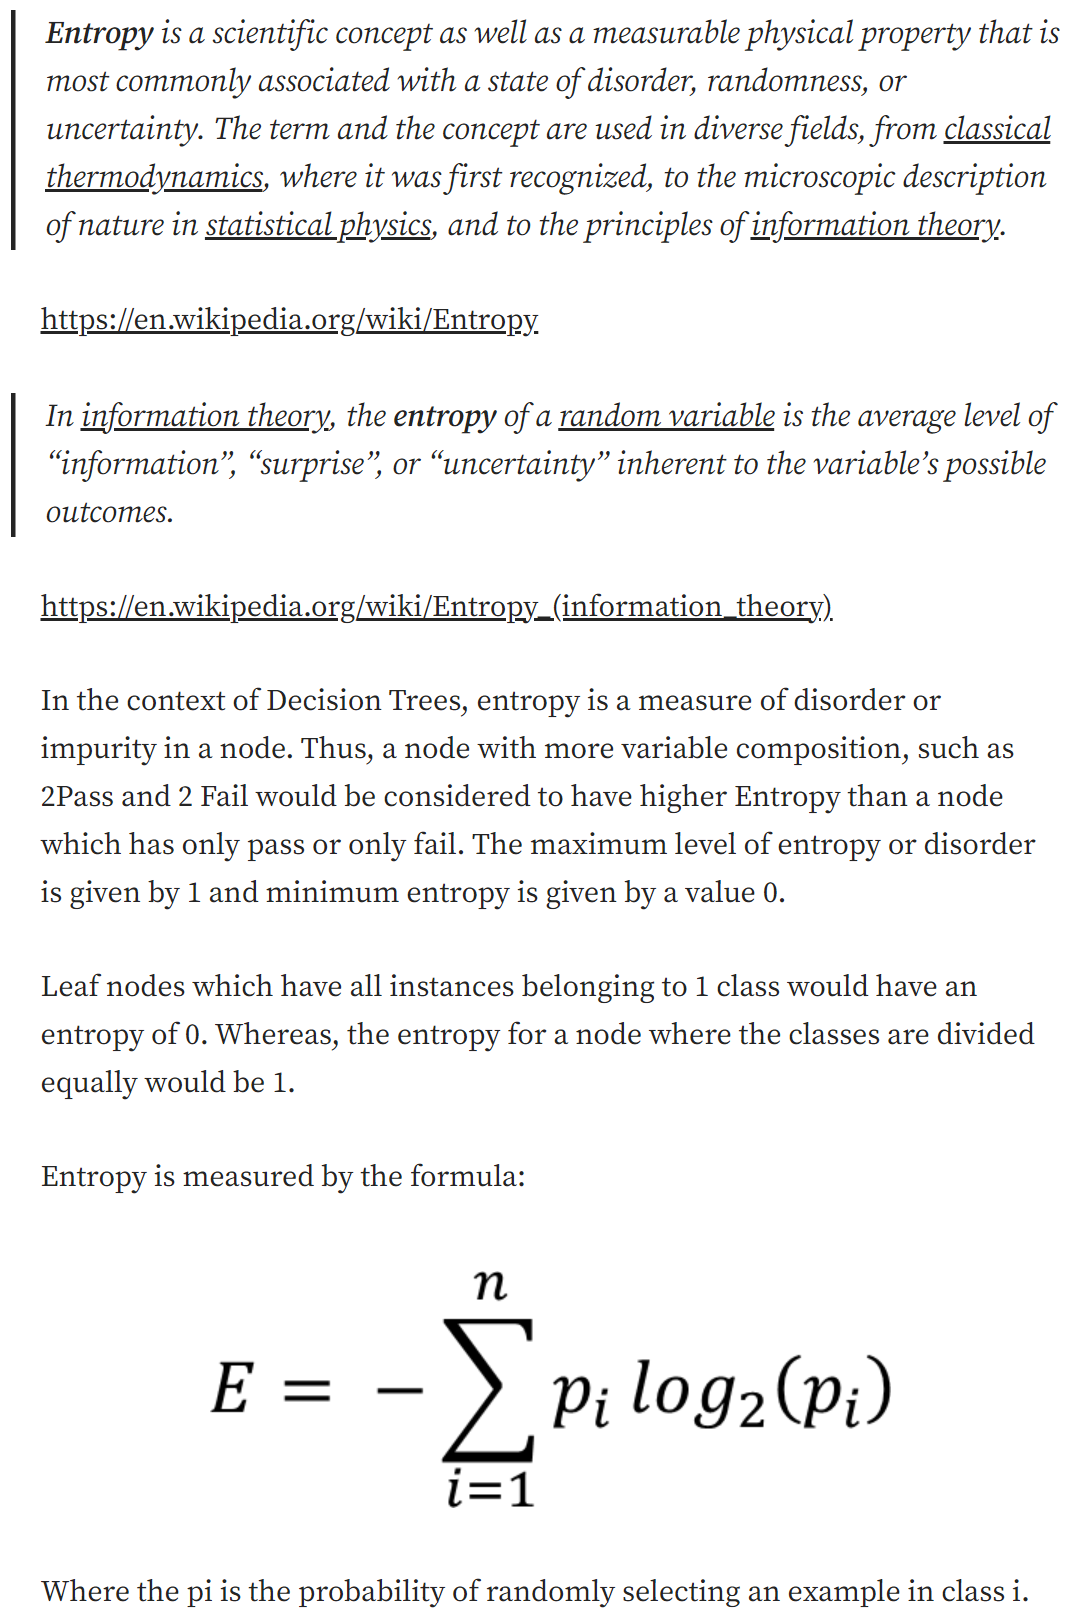

<Figure size 800x400 with 0 Axes>

DecisionTreeClassifier(max_depth=3, random_state=42)

Text(0.5, 0, 'Petal length (cm)')

Text(0, 0.5, 'Petal width (cm)')

Text(2.3999999880790712, 1.0, 'Depth=0')

Text(3.2, 1.77, 'Depth=1')

Text(5.000000047683716, 0.5, '(Depth=2)')

(0.0, 7.2, 0.0, 3.0)

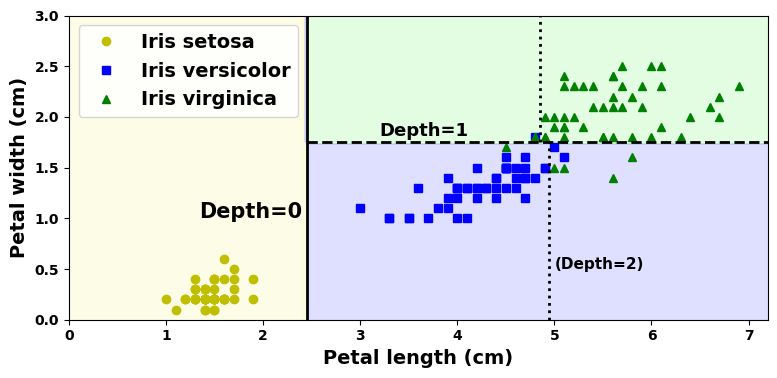

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")

plt.show()

shows this decision tree’s decision boundaries. The thick vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm. Since the lefthand area is pure (only Iris setosa), it cannot be split any further. However, the righthand area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line). Since max_depth was set to 2, the decision tree stops right there. If you set max_depth to 3, then the two depth-2 nodes would each add another decision boundary (represented by the two vertical dotted lines).

You can access the tree structure via the `tree_` attribute:

In [11]:
tree_clf.tree_

For more information, check out this class's documentation:

In [12]:
# help(sklearn.tree._tree.Tree)

See the extra material section below for an example.

# Estimating Class Probabilities

A decision tree can also estimate the probability that an instance belongs to a particular class k. First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node. For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the decision tree outputs the following probabilities: 0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54), and 9.3% for Iris virginica (5/54). And if you ask it to predict the class, it outputs Iris versicolor (class 1) because it has the highest probability. Let’s check this:


In [13]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [14]:
tree_clf.predict([[5, 1.5]])

array([1])

# Regularization Hyperparameters

 the CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each subsequent level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a solution that’s reasonably good but not guaranteed to be optimal.

Unfortunately, finding the optimal tree is known to be an NP-complete problem.⁠1 It requires O(exp(m)) time, making the problem intractable even for small training sets. This is why we must settle for a “reasonably good” solution when training decision trees.

By default, the DecisionTreeClassifier class uses the Gini impurity measure, but you can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy". The concept of entropy originated in thermodynamics as a measure of molecular disorder: entropy approaches zero when molecules are still and well ordered. Entropy later spread to a wide variety of domains, including in Shannon’s information theory, where it measures the average information content of a message, as we saw in Chapter 4. Entropy is zero when all messages are identical. In machine learning, entropy is frequently used as an impurity measure: a set’s entropy is zero when it contains instances of only one class. Equation 6-3 shows the definition of the entropy of the ith node. For example, the depth-2 left node in Figure 6-1 has an entropy equal to –(49/54) log2 (49/54) – (5/54) log2 (5/54) ≈ 0.445.

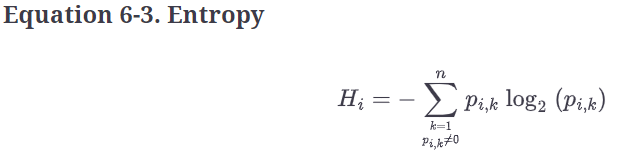
So, should you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

Reducing max_depth will regularize the model and thus reduce the risk of overfitting.
max_features
Maximum number of features that are evaluated for splitting at each node

max_leaf_nodes
Maximum number of leaf nodes

min_samples_split
Minimum number of samples a node must have before it can be split

min_samples_leaf
Minimum number of samples a leaf node must have to be created

min_weight_fraction_leaf
Same as min_samples_leaf but expressed as a fraction of the total number of weighted instances

In [15]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(random_state=42)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

Text(0.5, 1.0, 'No restrictions')

Text(0.5, 1.0, 'min_samples_leaf = 5')

Text(0, 0.5, '')

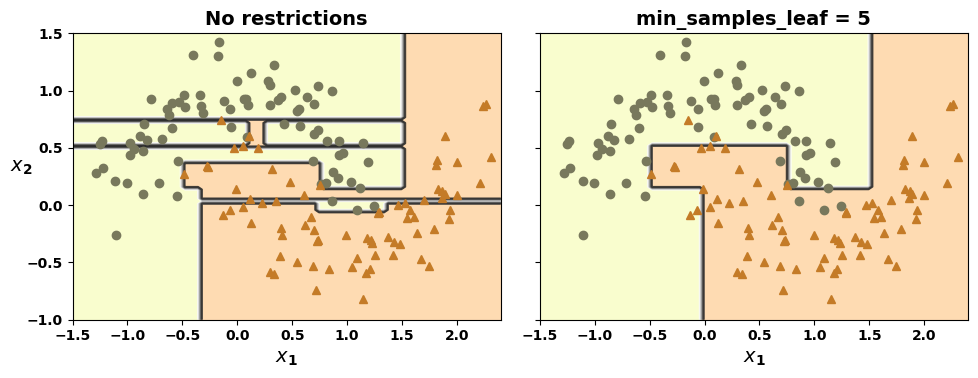

In [16]:
# extra code – this cell generates and saves Figure 6–3

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
save_fig("min_samples_leaf_plot")
plt.show()

The unregularized model on the left is clearly overfitting, and the regularized model on the right will probably generalize better. We can verify this by evaluating both trees on a test set generated using a different random seed:

In [17]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [18]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

# Regression

Let's prepare a simple quadratic training set:

**Code example:**

In [19]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

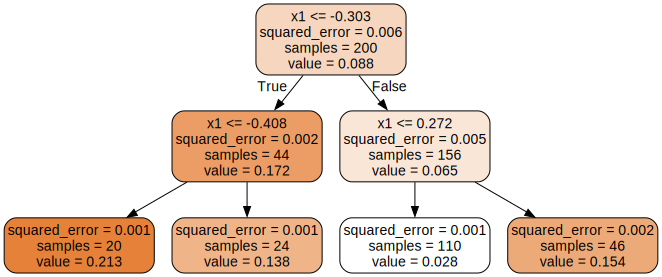

In [20]:
# extra code – we've already seen how to use export_graphviz()
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [21]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [22]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [23]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

This tree looks very similar to the classification tree you built earlier. The main difference is that instead of predicting a class in each node, it predicts a value. For example, suppose you want to make a prediction for a new instance with x1 = 0.2. The root node asks whether x1 ≤ 0.197. Since it is not, the algorithm goes to the right child node, which asks whether x1 ≤ 0.772. Since it is, the algorithm goes to the left child node. This is a leaf node, and it predicts value=0.111. This prediction is the average target value of the 110 training instances associated with this leaf node, and it results in a mean squared error equal to 0.015 over these 110 instances.

This model’s predictions are represented on the left in Figure 6-5. If you set max_depth=3, you get the predictions represented on the right. Notice how the predicted value for each region is always the average target value of the instances in that region. The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.



Text(-0.30265071988105774, 0.16, 'Depth=0')

Text(-0.39830373764038085, -0.01, 'Depth=1')

Text(0.2817575579881668, -0.01, 'Depth=1')

Text(0, 0.5, '$y$')

Text(0.5, 1.0, 'max_depth=2')

Text(-0.20270402520895003, 0.15, 'Depth=2')

Text(0.5, 1.0, 'max_depth=3')

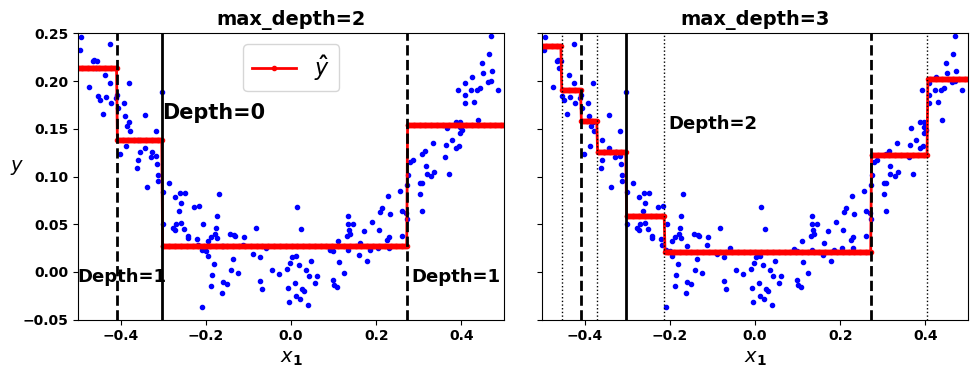

In [24]:
# extra code – this cell generates and saves Figure 6–5

def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

save_fig("tree_regression_plot")
plt.show()

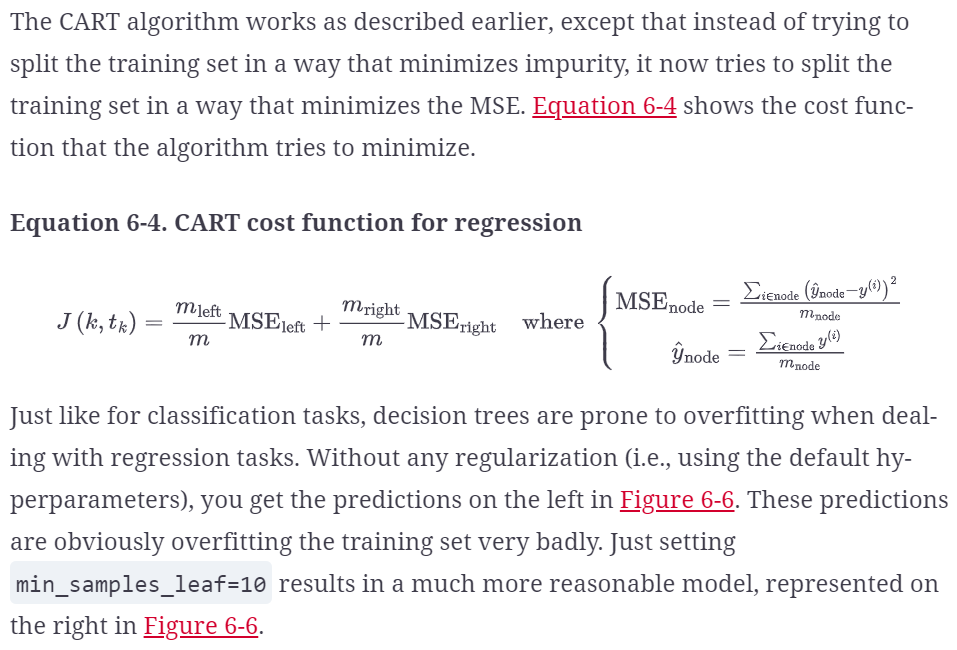

DecisionTreeRegressor(random_state=42)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

(-0.5, 0.5, -0.05, 0.25)

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

Text(0.5, 1.0, 'No restrictions')

(-0.5, 0.5, -0.05, 0.25)

Text(0.5, 0, '$x_1$')

Text(0.5, 1.0, 'min_samples_leaf=10')

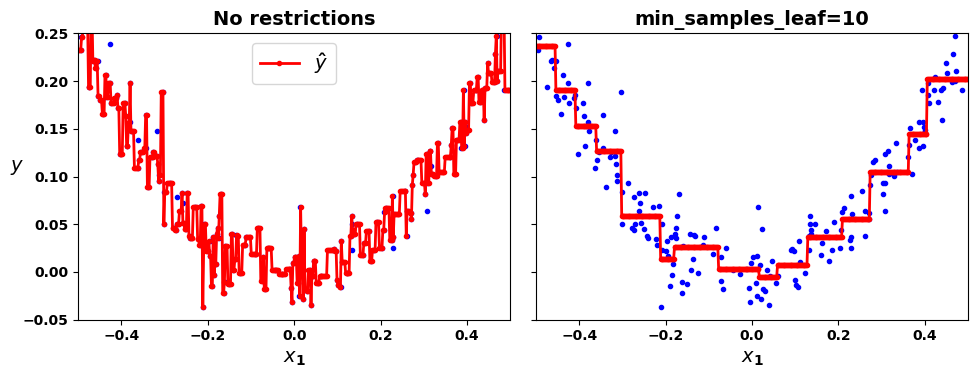

In [25]:
# extra code – this cell generates and saves Figure 6–6

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

save_fig("tree_regression_regularization_plot")
plt.show()

# Sensitivity to axis orientation

First, as you may have noticed, decision trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to the data’s orientation. For example, Figure 6-7 shows a simple linearly separable dataset: on the left, a decision tree can split it easily, while on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily convoluted. Although both decision trees fit the training set perfectly, it is very likely that the model on the right will not generalize well.

Rotating the dataset also leads to completely different decision boundaries:

DecisionTreeClassifier(random_state=42)

DecisionTreeClassifier(random_state=42)

Text(0, 0.5, '')

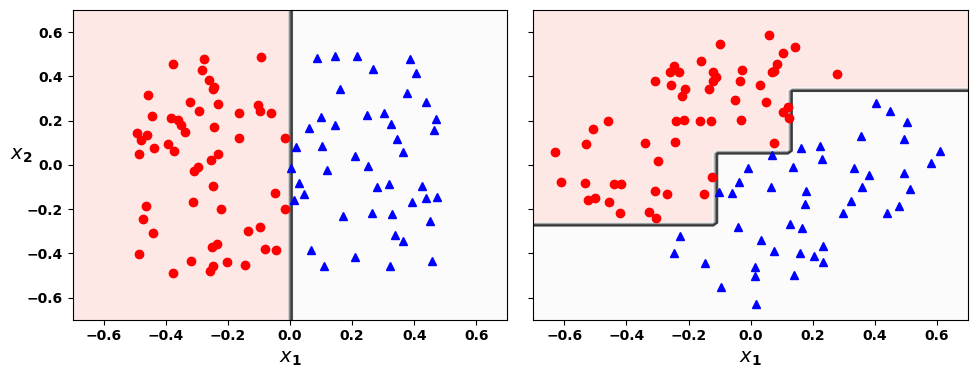

In [26]:
# extra code – this cell generates and saves Figure 6–7

np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

One way to limit this problem is to scale the data, then apply a principal component analysis transformation. We will look at PCA in detail in Chapter 8, but for now you only need to know that it rotates the data in a way that reduces the correlation between the features, which often (not always) makes things easier for trees.

In [27]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

<Figure size 800x400 with 0 Axes>

Text(0.5, 0, '$z_1$')

Text(0, 0.5, '$z_2$')

Text(-0.9211246019601822, -0.5499999999999999, 'Depth=0')

Text(0.747872462272644, -0.5499999999999999, 'Depth=1')

(-2.2, 2.4, -0.6, 0.7)

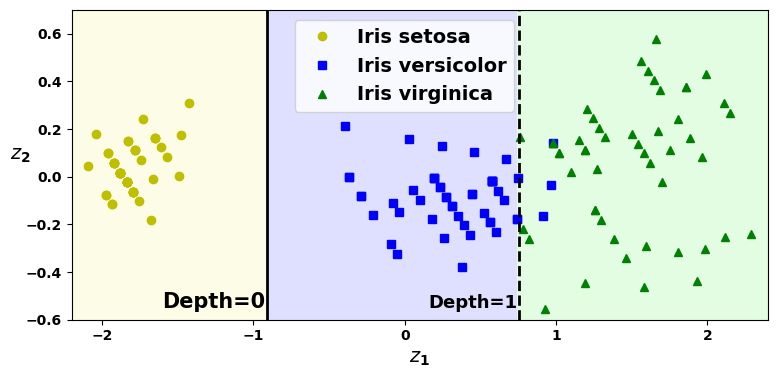

In [28]:
# extra code – this cell generates and saves Figure 6–8

plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
save_fig("pca_preprocessing_plot")

plt.show()

# Decision Trees Have High Variance

We've seen that small changes in the dataset (such as a rotation) may produce a very different Decision Tree.
Now let's show that training the same model on the same data may produce a very different model every time, since the CART training algorithm used by Scikit-Learn is stochastic. To show this, we will set `random_state` to a different value than earlier:

In [29]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

<Figure size 800x400 with 0 Axes>

Text(1.8, 0.850000011920929, 'Depth=0')

Text(2.3, 1.8, 'Depth=1')

Text(0.5, 0, 'Petal length (cm)')

Text(0, 0.5, 'Petal width (cm)')

(0.0, 7.2, 0.0, 3.0)

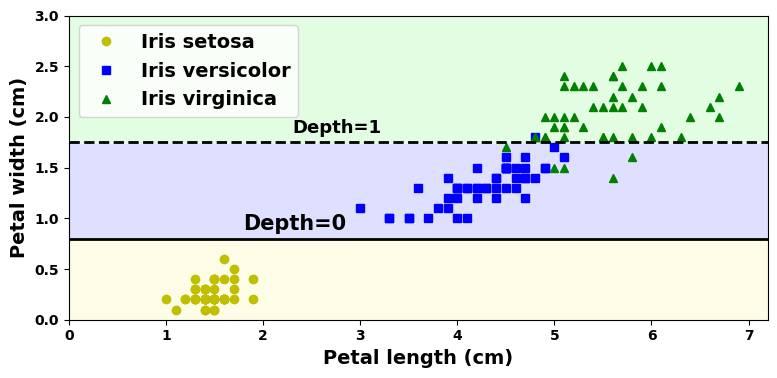

In [30]:
# extra code – this cell generates and saves Figure 6–9

plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_high_variance_plot")

plt.show()

# Extra Material – Accessing the tree structure

A trained `DecisionTreeClassifier` has a `tree_` attribute that stores the tree's structure:

In [31]:
tree = tree_clf.tree_
tree

You can get the total number of nodes in the tree:

In [32]:
tree.node_count

5

And other self-explanatory attributes are available:

In [33]:
tree.max_depth

2

In [34]:
tree.max_n_classes

3

In [35]:
tree.n_features

2

In [36]:
tree.n_outputs

1

In [37]:
tree.n_leaves

3

All the information about the nodes is stored in NumPy arrays. For example, the impurity of each node:

In [38]:
tree.impurity

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04253308])

The root node is at index 0. The left and right children nodes of node _i_ are `tree.children_left[i]` and `tree.children_right[i]`. For example, the children of the root node are:

In [39]:
tree.children_left[0], tree.children_right[0]

(1, 2)

When the left and right nodes are equal, it means this is a leaf node (and the children node ids are arbitrary):

In [40]:
tree.children_left[3], tree.children_right[3]

(-1, -1)

So you can get the leaf node ids like this:

In [41]:
is_leaf = (tree.children_left == tree.children_right)
np.arange(tree.node_count)[is_leaf]

array([1, 3, 4])

Non-leaf nodes are called _split nodes_. The feature they split is available via the `feature` array. Values for leaf nodes should be ignored:

In [42]:
tree.feature

array([ 0, -2,  1, -2, -2], dtype=int64)

And the corresponding thresholds are:

In [43]:
tree.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

And the number of instances per class that reached each node is available too:

In [44]:
tree.value

array([[[50., 50., 50.]],

       [[50.,  0.,  0.]],

       [[ 0., 50., 50.]],

       [[ 0., 49.,  5.]],

       [[ 0.,  1., 45.]]])

In [45]:
tree.n_node_samples

array([150,  50, 100,  54,  46], dtype=int64)

In [46]:
np.all(tree.value.sum(axis=(1, 2)) == tree.n_node_samples)

True

Here's how you can compute the depth of each node:

In [47]:
def compute_depth(tree_clf):
    tree = tree_clf.tree_
    depth = np.zeros(tree.node_count)
    stack = [(0, 0)]
    while stack:
        node, node_depth = stack.pop()
        depth[node] = node_depth
        if tree.children_left[node] != tree.children_right[node]:
            stack.append((tree.children_left[node], node_depth + 1))
            stack.append((tree.children_right[node], node_depth + 1))
    return depth

depth = compute_depth(tree_clf)
depth

array([0., 1., 1., 2., 2.])

Here's how to get the thresholds of all split nodes at depth 1:

In [48]:
tree_clf.tree_.feature[(depth == 1) & (~is_leaf)]

array([1], dtype=int64)

In [49]:
tree_clf.tree_.threshold[(depth == 1) & (~is_leaf)]

array([1.75])

# Exercise solutions

## 1. to 6.

1. The depth of a well-balanced binary tree containing _m_ leaves is equal to log₂(_m_), rounded up. log₂ is the binary log; log₂(_m_) = log(_m_) / log(2). A binary Decision Tree (one that makes only binary decisions, as is the case with all trees in Scikit-Learn) will end up more or less well balanced at the end of training, with one leaf per training instance if it is trained without restrictions. Thus, if the training set contains one million instances, the Decision Tree will have a depth of log₂(10<sup>6</sup>) ≈ 20 (actually a bit more since the tree will generally not be perfectly well balanced).
2. A node's Gini impurity is generally lower than its parent's. This is due to the CART training algorithm's cost function, which splits each node in a way that minimizes the weighted sum of its children's Gini impurities. However, it is possible for a node to have a higher Gini impurity than its parent, as long as this increase is more than compensated for by a decrease in the other child's impurity. For example, consider a node containing four instances of class A and one of class B. Its Gini impurity is 1 – (1/5)² – (4/5)² = 0.32. Now suppose the dataset is one-dimensional and the instances are lined up in the following order: A, B, A, A, A. You can verify that the algorithm will split this node after the second instance, producing one child node with instances A, B, and the other child node with instances A, A, A. The first child node's Gini impurity is 1 – (1/2)² – (1/2)² = 0.5, which is higher than its parent's. This is compensated for by the fact that the other node is pure, so its overall weighted Gini impurity is 2/5 × 0.5 + 3/5 × 0 = 0.2, which is lower than the parent's Gini impurity.
3. If a Decision Tree is overfitting the training set, it may be a good idea to decrease `max_depth`, since this will constrain the model, regularizing it.
4. Decision Trees don't care whether or not the training data is scaled or centered; that's one of the nice things about them. So if a Decision Tree underfits the training set, scaling the input features will just be a waste of time.
5. The computational complexity of training a Decision Tree is _O_(_n_ × _m_ log₂(_m_)). So if you multiply the training set size by 10, the training time will be multiplied by _K_ = (_n_ × 10 _m_ × log₂(10 _m_)) / (_n_ × _m_ × log₂(_m_)) = 10 × log₂(10 _m_) / log₂(_m_). If _m_ = 10<sup>6</sup>, then _K_ ≈ 11.7, so you can expect the training time to be roughly 11.7 hours.
6. If the number of features doubles, then the training time will also roughly double.

## 7.

_Exercise: train and fine-tune a Decision Tree for the moons dataset._

a. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

Adding `random_state=42` to make this notebook's output constant:

In [50]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. Split it into a training set and a test set using `train_test_split()`.

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons,
                                                    test_size=0.2,
                                                    random_state=42)

c. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.

In [52]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [53]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

d. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

By default, `GridSearchCV` trains the best model found on the whole training set (you can change this by setting `refit=False`), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [54]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8595

## 8.

_Exercise: Grow a forest._

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's `ShuffleSplit` class for this.

In [55]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                  random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [56]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

0.8056605

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode()` function for this). This gives you _majority-vote predictions_ over the test set.

In [57]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [58]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

C:\Users\donda\AppData\Local\Temp\ipykernel_15676\2539803968.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)


d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [59]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.873